In [11]:
import numpy as np
import pandas as pd
import spacy
import sklearn
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import preprocessor as p
from wordcloud import WordCloud
import missingno as msno
import seaborn as sns
import json

In [12]:
data=pd.read_csv("../../EYSociolytics/output_6_12_2020_14_17_3.csv")


In [18]:
data.drop(['near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest'],axis=1,inplace=True)

In [20]:
data.drop("reply_to",axis=1,inplace=True)

In [22]:
data.drop("cashtags",axis=1,inplace=True)

In [23]:
data.drop("place",axis=1,inplace=True)

In [24]:
data.drop(['id','conversation_id','created_at','date'],axis=1,inplace=True)

In [25]:
data.drop(['time','timezone','user_id'],axis=1,inplace=True)

In [26]:
data.drop(['username','name'],axis=1,inplace=True)

In [28]:
data['splitted_message']=data['tweet'].apply(lambda message:str(message).split())

In [30]:
def hashtag_finder(message):
    tweet = re.findall(r'#[a-zA-Z]+',str(message))
    hashtags=""
    for i in tweet:
        hashtags+=i
        hashtags+=" "
    return hashtags

In [31]:
data['hashtag']=data['splitted_message'].apply(hashtag_finder)

In [33]:
hashtags=""
for i in data['hashtag']:
    dat=i.split("#")
    for j in dat:
        if dat!="":
            hashtags+=j
            hashtags+=" "

In [34]:
hashtags

' FMCG  TransformationRealized   CFOs  technology  DNAoftheCFO   Cybersecurity  hackathon  Cybersecurity  AISS   TransformationRealized  Cybersecurity   digital  EYGCCPulseSurvey  EYGCC   Opinion   WEOY  entrepreneurs  Unstoppables    DidYouKnow  EYGCCPulseSurvey  Digital  EYGCC   cybersecurity  Cybersecurity  hackathon  AISS   WEOY  entrepreneurs  Unstoppables   TransformationRealized  Cybersecurity   DPIIT  EoDB   Participate  Hackathon  AISS   TransformationRealized  Cybersecurity   ETUnWired   CFOs  DNAoftheCFO   GCC  technology  EYGCCPulseSurvey  Digital  EYGCC   FDI  EYEyeOnIndia   Cybersecurity  hackathon  Cybersecurity  AISS     WEOY   EYGCCPulseSurvey  Digital  technology  EYGCC   Cybersecurity  hackathon  AISS   cybersecurity  TransformationRealized   tax  finance    technology   cybersecurity  AI  MachineLearning  TransformationRealized   COVID   COVID  TransformationRealized  GCC   IBOR   EYCAFTA   digital  EYGCC    IoT   cybersecurity  TransformationRealized  ArtificialInt

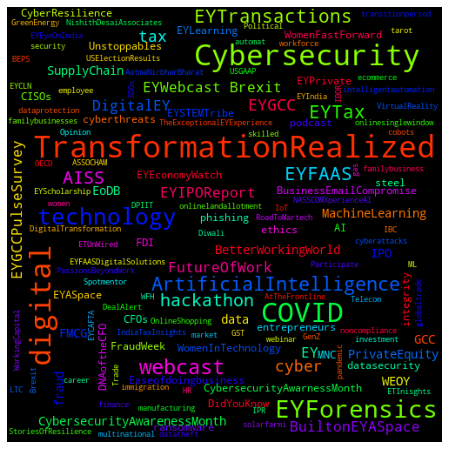

In [35]:
fig=plt.figure(figsize=(12,8))
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width = 500, height = 500, colormap='hsv', random_state=10).generate(hashtags)
plt.imshow(wordcloud) 
plt.axis("off");
fig.savefig("wordcloudoftags.jpg")

In [36]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aviru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [39]:
def clean_message(lst):
    message=''
    for i in lst:
        if str(i) in stopWords:
            continue
        elif str(i) in string.punctuation:
            continue
        elif str(i) in string.digits:
            continue
        else:
            message+=str(i)
            message+=" "
        
    return message

In [40]:
data['semi_clean']=data['splitted_message'].apply(clean_message)

In [42]:
def clean_text(message):
    clean_message=p.clean(message)
    return clean_message

In [43]:
data['cleaned_message']=data['semi_clean'].apply(clean_text)

In [44]:
def sentiment_calculator(message):
    cleaned_message=p.clean(message)
    blob=TextBlob(message)
    return blob.sentiment.polarity

In [45]:
data['polarity_score']=data['cleaned_message'].apply(sentiment_calculator)

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [47]:
def vader_sentiment_calculator(message):
    score1 = analyser.polarity_scores(message)
    return score1.get('compound')

In [49]:
data["vader_sentiment_score"]=data['cleaned_message'].apply(vader_sentiment_calculator)

In [50]:
def sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score > -0.05 and score <0.05:
        return "Neutral"
    elif score <= -0.05 : 
        return "Negative"

In [51]:
data['sentiment_category']=data['vader_sentiment_score'].apply(sentiment_category)

In [52]:
data_platform=dict(data['sentiment_category'].value_counts())
for key in data_platform:
    data_platform[key]=data_platform[key]/len(data)
    print(data_platform[key])

0.702020202020202
0.17676767676767677
0.12121212121212122


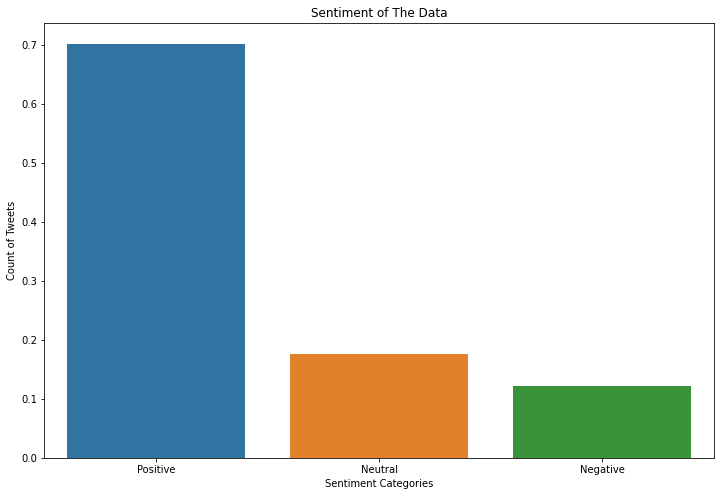

In [56]:
fig=plt.figure(figsize=(12,8))
plt.title("Sentiment of The Data")
plt.xlabel("Sentiment Categories")
plt.ylabel("Count of Tweets")
sns.barplot(x=list(data_platform.keys()),y=list(data_platform.values()),data=data)
fig.savefig("SentimentOfData.png")

In [59]:
data_platform

{'Positive': 0.702020202020202,
 'Neutral': 0.17676767676767677,
 'Negative': 0.12121212121212122}

In [62]:
json.dumps(data_platform)

'{"Positive": 0.702020202020202, "Neutral": 0.17676767676767677, "Negative": 0.12121212121212122}'